Logistic Regression

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [10]:
df = pd.read_csv('HR_Dataset Refresh.csv')

In [12]:
#According to employee satisfaction,project_count and , absences predict wheter the employee stays or not in the future

In [15]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Gender', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [18]:
Xvar = ['EmpSatisfaction','SpecialProjectsCount','Absences']
Yvar = 'Termd'

In [22]:
X= df[Xvar]
Y=df[Yvar]

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size = 0.2,random_state = 42,stratify = Y
)

In [42]:
model = LogisticRegression(solver = 'liblinear', random_state = 42,class_weight ='balanced')

In [44]:
model.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [46]:
Y_pred = model.predict(X_test)

In [48]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [51]:
cm = confusion_matrix(Y_pred,Y_test)

In [53]:
cm

array([[45, 13],
       [33, 26]], dtype=int64)

In [57]:
cr = classification_report(Y_pred,Y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.58      0.78      0.66        58
           1       0.67      0.44      0.53        59

    accuracy                           0.61       117
   macro avg       0.62      0.61      0.60       117
weighted avg       0.62      0.61      0.60       117



<Axes: >

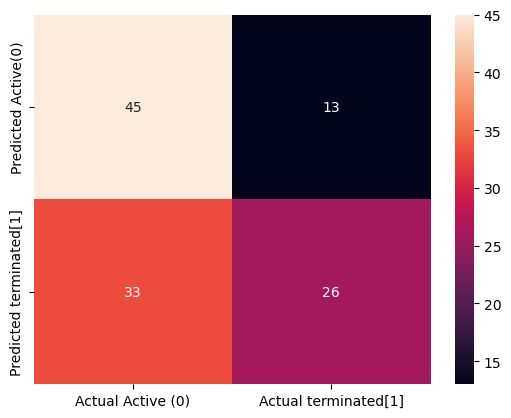

In [83]:
sns.heatmap(cm, annot= True,
           xticklabels = ['Actual Active (0)','Actual terminated[1]'],
           yticklabels = ['Predicted Active(0)','Predicted terminated[1]'])

In [91]:
new_pred = {
    'EmpSatisfaction' : [4,2],
    'SpecialProjectsCount': [3,10],
    'Absences': [10,4]
}

In [93]:
X_new = pd.DataFrame(new_pred)
Y_pred = model.predict(X_new)

In [95]:
X_new['Predicted Data']= Y_pred
X_new

,EmpSatisfaction,SpecialProjectsCount,Absences,Predicted Data
0,4,3,10,0
1,2,10,4,1
